In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image

* Convolutional neural networks (CNNs) emerged from the study of the brain’s visual cortex
* many neurons in the visual cortex have a small local receptive field, meaning they react only to visual stimuli located in a limited region of the visual field
* the higher-level neurons are based on the outputs of neighboring lower-level neurons

**Convolutional Layer**
* **Convolutional layer**: neurons in the first convolutional layer are not connected to every single pixel in the input image (like in a DNN), but only to pixels in their receptive fields
* **zero padding**: In order for a layer to have the same height and width as the previous layer, it is common to add zeros around the inputs,
* **stride**: The distance between two consecutive receptive fields

In [4]:
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")

dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape
print(f"Batch Size: {batch_size}")
print(f"Images' Height: {height}")
print(f"Images' Width: {width}")
print(f"Number of Channels: {channels}")

Batch Size: 2
Images' Height: 427
Images' Width: 640
Number of Channels: 3


/Users/gerardoduran/anaconda/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/Users/gerardoduran/anaconda/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/Users/gerardoduran/anaconda/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/Users/gerardoduran/anaconda/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imre

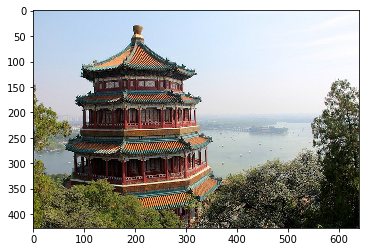

In [5]:
plt.imshow(china)

In [6]:
# Create two filters
filters = np.ones(shape=(3, 3, channels, 2), dtype=np.float32)
filters[:, 1, :, 0] = 0 # vertical line
filters[:, 2, :, 0] = -1 # vertical line

filters[1, :, :, 1] = 0 # horizontal line
filters[2, :, :, 1] = -1 # horizontal line

# Create a graph with input X plus a convolutional layer applying the two filters
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))

# *** Paddings ***
# VALID:  the convolutional layer does not use zero padding,
#         and may ignore some rows and columns at the bottom
#         and right of the input image, depending on the stride
# SAME: The convolutional layer uses zero-padding.
#       The number of output neurons is equal to the number
#       of input neurons divided by the stride
convolution = tf.nn.conv2d(X, filters, strides=[1, 2, 2, 1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

![](https://www.safaribooksonline.com/library/view/hands-on-machine-learning/9781491962282/assets/mlst_1307.png)

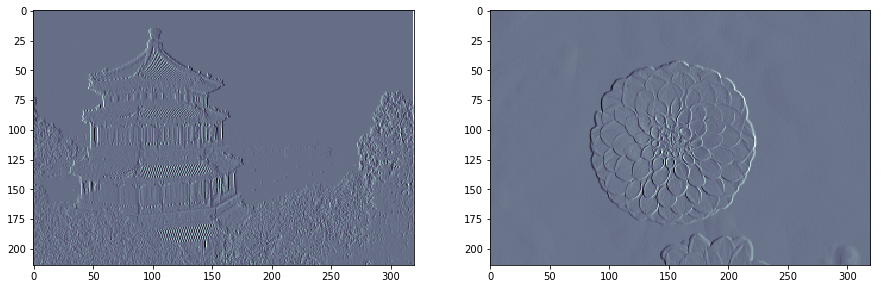

In [7]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(output[0, :, :, 0], cmap="bone")
ax2.imshow(output[1, :, :, 0], cmap="bone")

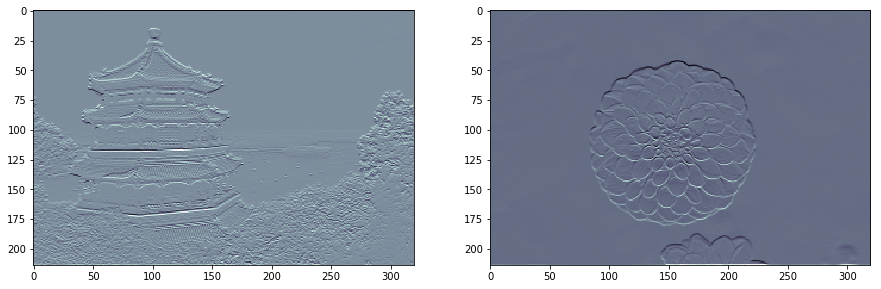

In [8]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(output[0, :, :, 1], cmap="bone")
ax2.imshow(output[1, :, :, 1], cmap="bone")

In in a *CNN*, `filters`, would be a variable to learn.

TensorFlow has a `tf.layers.conv2d()` function which creates the filters variable for you (named kernel), and initializes it randomly.

**Pooling Layers**: subsample (i.e., shrink) the input image in order to reduce the computational load, the memory usage, and the number of parameters (thereby limiting the risk of overfitting. A pooling neuron has no weights; all it does is aggregate the inputs using an aggregation function such as the max or mean.

A pooling layer typically works on every input channel independently, so the output depth is the same as the input depth

In [12]:
from ipywidgets import interact, IntSlider, Dropdown

def apply_pool(k, fnum):
    X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
    max_pool = tf.nn.max_pool(X, ksize=[1, k, k, 1], strides=[1, 2, 2, 1], padding="VALID")

    with tf.Session() as sess:
        output = sess.run(max_pool, feed_dict={X: dataset})
    
    plt.imshow(output[fnum].astype(np.uint8))
    plt.title(output[fnum].shape)
    
interact(apply_pool, k=IntSlider(min=1, max=20), fnum=Dropdown(options=[("China", 0), ("Flower", 1)], value=0))

interactive(children=(IntSlider(value=1, description='k', max=20, min=1), Dropdown(description='fnum', options…

<function __main__.apply_pool(k, fnum)>

In [10]:
dataset[0].shape

(427, 640, 3)

In [11]:
output[0].shape

(214, 320, 2)